In [1]:
import sys
sys.path.append('..')  # allow this notebook to find equal-level directories
from importing_modules import *
# pyomo.environ as oe, seaborn as sns, plotly.plotly as py, plotly.graph_objs as go
# from util.gjh_wrapper import gjh_solve, make_df, from vis import acres_bars, zL_bars
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Create problem instance

In [3]:
# Load data for each set, parameter, etc. to define a problem instance
objwrapper = CostObj()
data = objwrapper.load_data(savedata2file=False)

# ---- Set the tau target load ----
for k in data.tau:
    data.tau[k] = 12
    taustr = str(round(data.tau[k], 1))
# Print the target load reduction values
for l in mdl.LRSEGS:
    for p in mdl.PLTNTS:
        print('%s: %d' % (mdl.tau[l,p], mdl.tau[l,p].value))

# Create concrete problem instance using the separately defined optimization model
mdl = objwrapper.create_concrete(data=data)

# ---- Solver name ----
localsolver = True
solvername = 'ipopt'
# solvername = 'minos'

12
12
12


In [47]:
for index in mdl.x:
    mdl.x[index].value=-1
#             x_value = oe.value(v[index])

In [40]:
# mdl.x.pprint()

## Solve problem instance

In [52]:
myobj = SolveAndParse(instance=mdl, data=data, localsolver=localsolver, solvername=solvername)
merged_df = myobj.solve()
print('\nObjective is: %d' % oe.value(mdl.Total_Cost))

    'pyomo.core.base.suffix.Suffix'>) on block unknown with a new Component
    (type=<class 'pyomo.core.base.suffix.Suffix'>). This is usually indicative
    of a modelling error. To avoid this warning, use block.del_component() and
    block.add_component().
    (type=<class 'pyomo.core.base.suffix.Suffix'>) on block unknown with a new
    Component (type=<class 'pyomo.core.base.suffix.Suffix'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    (type=<class 'pyomo.core.base.suffix.Suffix'>) on block unknown with a new
    Component (type=<class 'pyomo.core.base.suffix.Suffix'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
Solver log file: 'logfile_loadobjective.log'
Solver solution file: '/var/folders/qx/2v7d4gls4d10zzr_ptplrx240000gr/T/tmpe27jsyo3.pyomo.sol'
Solver problem files: ('/var/folders/qx/2v7d4gls4d1

In [49]:
output_file_name = 'ipopt_output_file'  # defined in the ipopt.opt file
#output_file_name = 'test_ipopt_output_file.txt'

dict_of_iterates = myobj.parse_output_file(output_file_name)

In [43]:
dict_of_iterates.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [50]:
varvals = {}
varvals[0] = []
for ii in dict_of_iterates.keys():
    df = dict_of_iterates[ii]
#     display(df.head(5))
    val = float(df.loc[(df.outputname=='curr_x') &
                       (df.varname=='x') & 
                       (df.index.get_level_values('varindex')=='[ConPlan,N42071SL2_2410_2700,pas]')]['value'][0])
#     print(val)
    varvals[0].append(val)

varvals[1] = []
for ii in dict_of_iterates.keys():
    df = dict_of_iterates[ii]
    varvals[1].append(float(df.loc[(df.outputname=='curr_x') &
                                   (df.varname=='x') & 
                                   (df.index.get_level_values('varindex')=='[UrbanNMPlanHR,N42071SL2_2410_2700,ntg]')]['value'][0]))

Text(0,0.5,'varvals[1]')

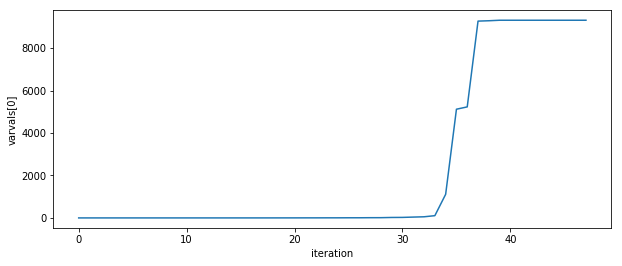

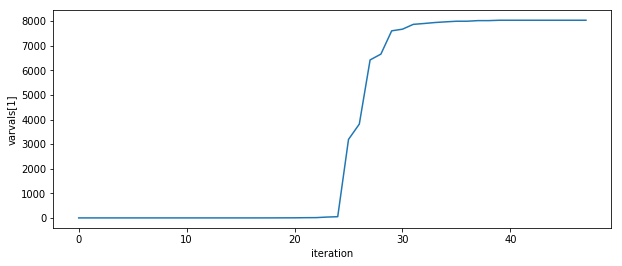

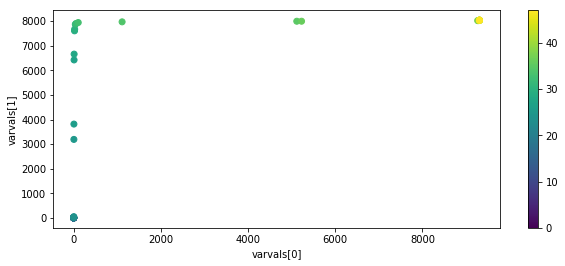

In [51]:
# Make Figure

fig = plt.figure(figsize=(10, 4))
rects = plt.plot(range(len(varvals[0])), varvals[0])
ax = plt.gca()
plt.ylabel('varvals[0]')
plt.xlabel('iteration')

fig = plt.figure(figsize=(10, 4))
rects = plt.plot(range(len(varvals[1])), varvals[1])
ax = plt.gca()
plt.ylabel('varvals[1]')
plt.xlabel('iteration')

fig = plt.figure(figsize=(10, 4))
rects = plt.scatter(varvals[0], varvals[1], c=range(len(varvals[1])))
ax = plt.gca()
plt.colorbar()
plt.xlabel('varvals[0]')
plt.ylabel('varvals[1]')

## Visualize

In [46]:
merged_df.tail(50)

,bmpshortname,landriversegment,loadsource,zL,acres,totalannualizedcostperunit,totalinstancecost
6254,CoverCropTradNutTEO,N42071SL2_2410_2700,cci,NaN,1.0,66.67,66.67
6255,CoverCropTradNutTEO,N42071SL2_2410_2700,mir,NaN,1.0,66.67,66.67
6256,CoverCropTradNutTEO,N42071SL2_2410_2700,cnr,NaN,1.0,66.67,66.67
6257,CoverCropTradNutTEO,N42071SL2_2410_2700,cfr,NaN,1.0,66.67,66.67
6258,CoverCropTradNutTEO,N42071SL2_2410_2700,lhy,NaN,1.0,66.67,66.67
6259,CoverCropTradNutTEO,N42071SL2_2410_2700,nir,NaN,1.0,66.67,66.67
6260,CoverCropTradNutTEO,N42071SL2_2410_2700,fnp,NaN,1.0,66.67,66.67
6261,CoverCropTradNutTEO,N42071SL2_2410_2700,nch,NaN,1.0,66.67,66.67
6262,CoverCropTradNutTEO,N42071SL2_2410_2700,cch,NaN,1.0,66.67,66.67
6263,CoverCropTradNutTEO,N42071SL2_2410_2700,for,NaN,1.0,66.67,66.67


In [ ]:
for l in mdl.LRSEGS:
    for p in mdl.PLTNTS:
        print('%s: %d' % (mdl.TargetPercentReduction[l,p], oe.value(mdl.TargetPercentReduction[l,p].body)))

In [ ]:
# ---- Make zL Figure ----
filenamestr = ''.join(['output/costobj_zL_tau', taustr, '_', solvername, '_',
                       datetime.now().strftime('%Y-%m-%d_%H%M%S'),
                       '.png'])
savefilepathandname = os.path.join(projectpath, filenamestr)

zL_bars(df=merged_df, instance=mdl,
        savefig=True, savefilepathandname=savefilepathandname)

In [ ]:
# ---- Acres Figure ----
sorteddf_byacres = merged_df.sort_values(by='acres')

filenamestr = ''.join(['output/costobj_x_tau', taustr, '_', solvername, '_',
                       datetime.now().strftime('%Y-%m-%d_%H%M%S'), '.png'])
savefilepathandname = os.path.join(projectpath, filenamestr)

objstr = ''.join(['Objective is: ', str(round(mdl.Total_Cost(), 2))])
titlestr = '\n'.join([objstr, 'labels are (cost per unit, total bmp instance cost)'])

acres_bars(df=sorteddf_byacres, instance=mdl, titlestr=titlestr,
           savefig=True, savefilepathandname=savefilepathandname)

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1517deeae8> (for post_execute):


ValueError: object too deep for desired array

## Gradient, Jacobian, Hessian

In [ ]:
gjh_filename, g = gjh_solve(instance=mdl,
                            keepfiles=True,
                            amplenv=ampl,
                            basegjhpath=os.getcwd())

g_df = make_df(instance=mdl, filterbydf=merged_df, g=g)

g_df = sorteddf_byacres.merge(g_df, how='left',
                              on=['bmpshortname', 'landriversegment', 'loadsource'],
                              sort=False)

In [ ]:
# ---- Make gradient Figure ----
# g_df_filtered = g_df.loc[abs(g_df['g'])>0.001,:].copy()
g_df_filtered = g_df
# sorteddf = g_df_filtered.sort_values(by='g')
# sorteddf_byacres

# sorteddf_byacres
# g_df = g_df.merge(sorteddf_byacres, how='right',
#                on=['bmpshortname', 'landriversegment', 'loadsource'])

keystrs = [str([x, y]) for x, y in zip(g_df_filtered['bmpshortname'], g_df_filtered['loadsource'])]
# Make Figure
fig = plt.figure(figsize=(10, 4))
rects = plt.barh(y=keystrs, width=g_df_filtered['g'])
ax = plt.gca()

ax.set_position([0.3,0.1,0.5,0.8])


filenamestr = ''.join(['output/costobj_g_tau', taustr, '_', solvername, '_',
                       datetime.now().strftime('%Y-%m-%d_%H%M%S'),
                       '.png'])
plt.savefig(os.path.join(projectpath, filenamestr))

In [ ]:
# #Read number of variables and constraints
# nl_file = open(''.join([filecode, '.pyomo.nl']),'r')
# nl_lines = nl_file.readlines()
# num_variables = int(nl_lines[1].split(' ')[1])
# num_constraints = int(nl_lines[1].split(' ')[2])

In [ ]:
for v in mdl.component_objects(oe.Var, active=True):
    print ("Variable component object",v)
    i=0
    for index in v:
        try:
            x_value = oe.value(v[index])
            i+=1
            try:
                print (i,"   ", index, v[index].value, g[i])
            except:
                print (i,"   ", index, v[index].value)
        except:
            pass

In [ ]:
# #Read number of variables and constraints
# gjh_file = open(''.join([filecode, '.pyomo.gjh']),'r')
# gjh_lines = gjh_file.readlines()

In [ ]:
# print(gjh_lines[1])

In [ ]:
# num_variables = int(gjh_lines[1].split(' ')[1])
# num_constraints = int(gjh_lines[1].split(' ')[2])

In [ ]:
# #Read gjh output file
# gjh = oe.AbstractModel()
# # gjh.n_var = oe.Set(initialize=range(1,num_variables+1))
# # gjh.n_cons = oe.Set(initialize=range(1,num_constraints+1))
# # gjh.g = oe.Param(gjh.n_var, default=0)
# # gjh.J = oe.Param(gjh.n_cons, gjh.n_var, default=0)
# # gjh.H = oe.Param(gjh.n_var, gjh.n_var, default=0)
# # os.rename(''.join([filecode, '.pyomo.gjh']), ''.join([filecode, '.pyomo.gjh.dat']))
# gjh_ins = gjh.create_instance(''.join([filecode, '.pyomo.gjh.dat']))

# #Print
# for i in gjh_ins.n_var:
#     print(gjh_ins.g[i])